In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline
## display all the columns of a dataframe 

pd.pandas.set_option('display.max_columns',None)

sns.set_style("whitegrid")
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import OrdinalEncoder

from tqdm import tqdm
import sys
import warnings
warnings.filterwarnings("ignore")

## load the dataset

In [6]:
from scipy.io import arff
import pandas as pd

# Load the ARFF file
file_path = "KDDTrain+.arff"
data, meta = arff.loadarff(file_path)

# Convert the data to a Pandas DataFrame
df = pd.DataFrame(data)

# Display the first few rows of the DataFrame
print("ARFF Data:")
print(df.head())


ValueError: icmp value not in ('tcp', 'udp', " 'icmp'")

In [41]:
print('Number of Data Points: ', data.shape[0])
print('Number of features: ', data.shape[1])
print('-'*100)
print('The attributes of data: ', data.columns.values)

Number of Data Points:  12684
Number of features:  26
----------------------------------------------------------------------------------------------------
The attributes of data:  ['destination' 'passanger' 'weather' 'temperature' 'time' 'coupon'
 'expiration' 'gender' 'age' 'maritalStatus' 'has_children' 'education'
 'occupation' 'income' 'car' 'Bar' 'CoffeeHouse' 'CarryAway'
 'RestaurantLessThan20' 'Restaurant20To50' 'toCoupon_GEQ5min'
 'toCoupon_GEQ15min' 'toCoupon_GEQ25min' 'direction_same' 'direction_opp'
 'Y']


In [42]:
Y_value_counts = data.groupby('Y').Y.count()
print('The number of users that are accepted the coupon is ',Y_value_counts[1],',',round(Y_value_counts[1]/data.shape[0]*100,3),'%')
print('The number of users that are rejected the coupon is ',Y_value_counts[0],',',round(Y_value_counts[0]/data.shape[0]*100,3),'%')

The number of users that are accepted the coupon is  7210 , 56.843 %
The number of users that are rejected the coupon is  5474 , 43.157 %


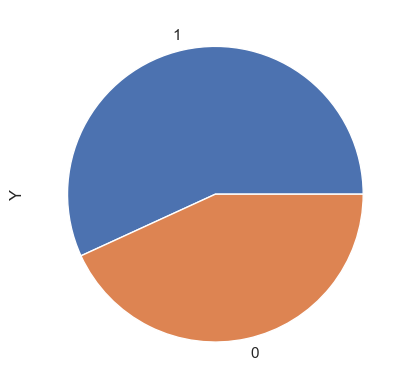

In [43]:
data['Y'].value_counts().plot.pie()
plt.show()

This dataset is partially balanced with acceptance class labels are approx 57% and reject class labels are approx 43%.

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

## Data Cleaning

In [45]:
# Remove duplicates
duplicate = data[data.duplicated(keep = 'last')]
# duplicate.shape #(74, 26)
data = data.drop_duplicates()
print(data.shape)

(12610, 26)


In [46]:
# missing values
print('Is there any missing value present or not?',data.isnull().values.any())
missing_percentage = data.isnull().sum()*100/len(data)
missing_value_df = pd.DataFrame({'missing_count': data.isnull().sum(),'missing_percentage': missing_percentage})
missing_value_df[missing_value_df.missing_count != 0]

Is there any missing value present or not? True


,missing_count,missing_percentage
car,12502,99.143537
Bar,107,0.848533
CoffeeHouse,217,1.720856
CarryAway,150,1.189532
RestaurantLessThan20,129,1.022998
Restaurant20To50,189,1.498810


Feature 'car' has 99% of the missing value, drop this feature because even after predicting missing values, this feature has less importance, and it has less predictive power.

In [47]:
data = data.drop(['car'], axis=1)

In [48]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,1,0,0,1,0


## Correlation of Features 

In [49]:
data.corr() # Co-variance matrix

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
temperature,1.000000,-0.018599,NaN,-0.157089,-0.227165,0.097972,-0.097972,0.059393
has_children,-0.018599,1.000000,NaN,0.079434,-0.010773,-0.032353,0.032353,-0.045056
toCoupon_GEQ5min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
toCoupon_GEQ15min,-0.157089,0.079434,NaN,1.000000,0.321260,-0.302066,0.302066,-0.082693
toCoupon_GEQ25min,-0.227165,-0.010773,NaN,0.321260,1.000000,-0.189900,0.189900,-0.108139
direction_same,0.097972,-0.032353,NaN,-0.302066,-0.189900,1.000000,-1.000000,0.014932
direction_opp,-0.097972,0.032353,NaN,0.302066,0.189900,-1.000000,1.000000,-0.014932
Y,0.059393,-0.045056,NaN,-0.082693,-0.108139,0.014932,-0.014932,1.000000


temperature          3
has_children         2
toCoupon_GEQ5min     1
toCoupon_GEQ15min    2
toCoupon_GEQ25min    2
direction_same       2
direction_opp        2
Y                    2
dtype: int64

<span style='color:green'>1.Feature ‘direction_same’ is perfectly correlated with ‘direction_opp’, both have the same variance.

<span style='color:green'>2.‘toCoupon_GEQ5min’ feature has no correlation with any feature .we can tell that 'toCoupon_GEQ5min' has only one unique variable which won't help much in the encoding of the categorical variables. Therefore, its better to drop that column.

<span style='color:green'>So, drop both 'direction_opp' and 'toCoupon_GEQ5min' features.</span>


In [51]:
data = data.drop(['direction_opp', 'toCoupon_GEQ5min'], axis=1)
data.shape

(12610, 23)

In [52]:
data.describe()

,temperature,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,Y
count,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000
mean,63.267248,0.414512,0.559794,0.116019,0.215543,0.567565
std,19.153386,0.492657,0.496432,0.320260,0.411215,0.495434
min,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,80.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,80.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [53]:
# Analysis of 'direction_same' feature
df = pd.DataFrame(sorted(list(data['direction_same'].unique())),columns=['direction_same'])
df['Total_Count'] = list(data.groupby('direction_same').Y.count())
df['Total_%'] = round(df['Total_Count']/data['direction_same'].shape[0]*100,3)
df['Accepted'] = list(data[data.Y==1].groupby('direction_same').Y.count())
df['Rejected'] = list(data[data.Y==0].groupby('direction_same').Y.count())
df['%Accepted'] = round(df['Accepted']/df['Total_Count']*100,3)
df['%Rejected'] = round(df['Rejected']/df['Total_Count']*100,3)
df

,direction_same,Total_Count,Total_%,Accepted,Rejected,%Accepted,%Rejected
0,0,9892,78.446,5576,4316,56.369,43.631
1,1,2718,21.554,1581,1137,58.168,41.832


direction_same feature has 78% value is '0', and 22% value is '1'. Both value has almost similar acceptance ratio. so this feature not more usefull. So, drop 'direction_same' feature.

In [54]:
data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,0,0,0,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,0,0,0,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,0,0,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,0,0,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,0,0,1,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,0,0,0,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,0,0,1,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,1,1,0,0


## Train-Test Split

In [55]:
X = data.drop(['Y'], axis=1)
y = data['Y'].values

In [56]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(10088, 22) (10088,)
(2522, 22) (2522,)


## Mode Imputation 

In [57]:
# mode imputation for missing values in train data
X_train['Bar'] = X_train['Bar'].fillna(X_train['Bar'].value_counts().index[0])
X_train['CoffeeHouse'] = X_train['CoffeeHouse'].fillna(X_train['CoffeeHouse'].value_counts().index[0])
X_train['CarryAway'] = X_train['CarryAway'].fillna(X_train['CarryAway'].value_counts().index[0])
X_train['RestaurantLessThan20'] = X_train['RestaurantLessThan20'].fillna(X_train['RestaurantLessThan20'].value_counts().index[0])
X_train['Restaurant20To50'] = X_train['Restaurant20To50'].fillna(X_train['Restaurant20To50'].value_counts().index[0])

In [58]:
# mode imputation for missing values in test data
X_test['Bar'] = X_test['Bar'].fillna(X_train['Bar'].value_counts().index[0])
X_test['CoffeeHouse'] = X_test['CoffeeHouse'].fillna(X_train['CoffeeHouse'].value_counts().index[0])
X_test['CarryAway'] = X_test['CarryAway'].fillna(X_train['CarryAway'].value_counts().index[0])
X_test['RestaurantLessThan20'] = X_test['RestaurantLessThan20'].fillna(X_train['RestaurantLessThan20'].value_counts().index[0])
X_test['Restaurant20To50'] = X_test['Restaurant20To50'].fillna(X_train['Restaurant20To50'].value_counts().index[0])

In [59]:
X_train.isnull().values.any()

False

In [60]:
X_test.isnull().values.any()

False

In [61]:
data.head(15)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,0,0,0,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,0,0,0,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,0,0,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,0,0,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,0,0,0
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,0,0,1
6,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,0,0,1
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,0,0,1
8,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,0,0,1
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,0,0,0


In [62]:
for column in data.columns:
    unique_values = data[column].unique()
    print(f'  "{column}": {unique_values}')

  "destination": ['No Urgent Place' 'Home' 'Work']
  "passanger": ['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
  "weather": ['Sunny' 'Rainy' 'Snowy']
  "temperature": [55 80 30]
  "time": ['2PM' '10AM' '6PM' '7AM' '10PM']
  "coupon": ['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
  "expiration": ['1d' '2h']
  "gender": ['Female' 'Male']
  "age": ['21' '46' '26' '31' '41' '50plus' '36' 'below21']
  "maritalStatus": ['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
  "has_children": [1 0]
  "education": ['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']
  "occupation": ['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social S

## Feature Engineering

### to_Coupon  ==>combination of two features, toCoupon_GEQ15min and toCoupon_GEQ25min

 -creating a new feature to_Coupon based on the values of toCoupon_GEQ15min and toCoupon_GEQ25min.
 -checking the values of toCoupon_GEQ15min and toCoupon_GEQ25min for each row and assigning a value to to_Coupon accordingly. The resulting to_Coupon feature will have three unique values (0, 1, and 2) based on the combinations of the two original features.
 -This approach can be beneficial if there is meaningful information in the relationship between toCoupon_GEQ15min and toCoupon_GEQ25min that could influence the target variable.

In [63]:
# FE -- to_Coupon is combination of two features, toCoupon_GEQ15min and toCoupon_GEQ25min
to_Coupon = []
for i in range(X_train.shape[0]):
    if (list(X_train['toCoupon_GEQ15min'])[i] == 0):
        to_Coupon.append(0)
    elif (list(X_train['toCoupon_GEQ15min'])[i] == 1)and(list(X_train['toCoupon_GEQ25min'])[i] == 0):
        to_Coupon.append(1)
    else:
        to_Coupon.append(2)
        
X_train['to_Coupon'] = to_Coupon
print('Unique values:',X_train['to_Coupon'].unique())
print('-'*50)
X_train['to_Coupon'].describe()

Unique values: [1 0 2]
--------------------------------------------------


count    10088.000000
mean         0.676249
std          0.670190
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: to_Coupon, dtype: float64

In [64]:
# to_Coupon is combination of two features, toCoupon_GEQ15min and toCoupon_GEQ25min
to_Coupon = []
for i in range(X_test.shape[0]):
    if (list(X_test['toCoupon_GEQ15min'])[i] == 0):
        to_Coupon.append(0)
    elif (list(X_test['toCoupon_GEQ15min'])[i] == 1)and(list(X_test['toCoupon_GEQ25min'])[i] == 0):
        to_Coupon.append(1)
    else:
        to_Coupon.append(2)
        
X_test['to_Coupon'] = to_Coupon
print('Unique values:',X_test['to_Coupon'].unique())
print('-'*50)
X_test['to_Coupon'].describe()


Unique values: [0 1 2]
--------------------------------------------------


count    2522.000000
mean        0.674068
std         0.677772
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: to_Coupon, dtype: float64

### coupon_freq  ==> is combination of five features, RestaurantLessThan20, CoffeeHouse, CarryAway, Bar, Restaurant20To50

coupon_freq: This new feature represents the frequency of using different types of coupons. It was created using existing features that describe coupon preferences, including 'RestaurantLessThan20', 'CoffeeHouse', 'CarryAway', 'Bar', and 'Restaurant20To50'and the feature 'coupon'. By assigning numerical values to each type of coupon based on usage frequency (e.g., '4~8' for high frequency and 'never' for zero frequency), we were able to aggregate this information to obtain coupon_freq. This new feature allows us to explore the relationships between coupon preferences and other variables.

In [65]:
# FE -- coupon_freq is combination of five features, RestaurantLessThan20, CoffeeHouse, CarryAway, Bar, Restaurant20To50
coupon_freq = []
for i in range(X_train.shape[0]):
    if (list(X_train['coupon'])[i] == 'Restaurant(<20)'):
        coupon_freq.append(list(X_train['RestaurantLessThan20'])[i])
    elif (list(X_train['coupon'])[i] == 'Coffee House'):
        coupon_freq.append(list(X_train['CoffeeHouse'])[i])
    elif (list(X_train['coupon'])[i] == 'Carry out & Take away'):
        coupon_freq.append(list(X_train['CarryAway'])[i])
    elif (list(X_train['coupon'])[i] == 'Bar'):
        coupon_freq.append(list(X_train['Bar'])[i])
    elif (list(X_train['coupon'])[i] == 'Restaurant(20-50)'):
        coupon_freq.append(list(X_train['Restaurant20To50'])[i])
        
X_train['coupon_freq'] = coupon_freq
print('Unique values:',X_train['coupon_freq'].unique())
print('-'*50)
X_train['coupon_freq'].describe()

Unique values: ['less1' '1~3' 'never' 'gt8' '4~8']
--------------------------------------------------


count     10088
unique        5
top         1~3
freq       3060
Name: coupon_freq, dtype: object

In [28]:
# FE -- coupon_freq is combination of five features, RestaurantLessThan20, CoffeeHouse, CarryAway, Bar, Restaurant20To50
coupon_freq = []
for i in range(X_test.shape[0]):
    if (list(X_test['coupon'])[i] == 'Restaurant(<20)'):
        coupon_freq.append(list(X_test['RestaurantLessThan20'])[i])
    elif (list(X_test['coupon'])[i] == 'Coffee House'):
        coupon_freq.append(list(X_test['CoffeeHouse'])[i])
    elif (list(X_test['coupon'])[i] == 'Carry out & Take away'):
        coupon_freq.append(list(X_test['CarryAway'])[i])
    elif (list(X_test['coupon'])[i] == 'Bar'):
        coupon_freq.append(list(X_test['Bar'])[i])
    elif (list(X_test['coupon'])[i] == 'Restaurant(20-50)'):
        coupon_freq.append(list(X_test['Restaurant20To50'])[i])
        
X_test['coupon_freq'] = coupon_freq
print('Unique values:',X_test['coupon_freq'].unique()) 
print('-'*50)
X_test['coupon_freq'].describe()

Unique values: ['1~3' '4~8' 'never' 'less1' 'gt8']
--------------------------------------------------


count     2522
unique       5
top        1~3
freq       775
Name: coupon_freq, dtype: object

## occupation_class

In [29]:
X_train['occupation'].describe()

count          10088
unique            25
top       Unemployed
freq            1517
Name: occupation, dtype: object

In [30]:
# occupation feature has 25 no of distinct values, which creates very sparsity in data after Encoding
# FE -- occupation_class where categorize all occupation in its suitable class.
occupation_dict = {'Healthcare Support':'High_Acceptance','Construction & Extraction':'High_Acceptance','Healthcare Practitioners & Technical':'High_Acceptance',
                   'Protective Service':'High_Acceptance','Architecture & Engineering':'High_Acceptance','Production Occupations':'Medium_High_Acceptance',
                    'Student':'Medium_High_Acceptance','Office & Administrative Support':'Medium_High_Acceptance','Transportation & Material Moving':'Medium_High_Acceptance',
                    'Building & Grounds Cleaning & Maintenance':'Medium_High_Acceptance','Management':'Medium_Acceptance','Food Preparation & Serving Related':'Medium_Acceptance',
                   'Life Physical Social Science':'Medium_Acceptance','Business & Financial':'Medium_Acceptance','Computer & Mathematical':'Medium_Acceptance',
                    'Sales & Related':'Medium_Low_Acceptance','Personal Care & Service':'Medium_Low_Acceptance','Unemployed':'Medium_Low_Acceptance',
                   'Farming Fishing & Forestry':'Medium_Low_Acceptance','Installation Maintenance & Repair':'Medium_Low_Acceptance','Education&Training&Library':'Low_Acceptance',
                    'Arts Design Entertainment Sports & Media':'Low_Acceptance','Community & Social Services':'Low_Acceptance','Legal':'Low_Acceptance','Retired':'Low_Acceptance'}
# occupation_dict
X_train['occupation_class'] = X_train['occupation'].map(occupation_dict)
print('Unique values:',X_train['occupation_class'].unique())
print('-'*50)
X_train['occupation_class'].describe()
# X_train['occupation_class'].value_counts()

Unique values: ['Low_Acceptance' 'Medium_High_Acceptance' 'Medium_Low_Acceptance'
 'Medium_Acceptance' 'High_Acceptance']
--------------------------------------------------


count                     10088
unique                        5
top       Medium_Low_Acceptance
freq                       2667
Name: occupation_class, dtype: object

In [31]:
# After Feature Engineering, removing unwanted features
X_train = X_train.drop(['toCoupon_GEQ15min','toCoupon_GEQ25min','Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50','occupation'], axis=1)
X_test = X_test.drop(['toCoupon_GEQ15min','toCoupon_GEQ25min','Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50','occupation'], axis=1)
print('X_train:',X_train.shape,'\nX_test:',X_test.shape)
print('-'*50)
print(X_train.columns.values)

X_train: (10088, 17) 
X_test: (2522, 16)
--------------------------------------------------
['destination' 'passanger' 'weather' 'temperature' 'time' 'coupon'
 'expiration' 'gender' 'age' 'maritalStatus' 'has_children' 'education'
 'income' 'direction_same' 'to_Coupon' 'coupon_freq' 'occupation_class']


In [32]:
X_train

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,income,direction_same,to_Coupon,coupon_freq,occupation_class
9183,No Urgent Place,Friend(s),Sunny,80,2PM,Restaurant(20-50),1d,Male,21,Single,0,Bachelors degree,$87500 - $99999,0,1,less1,Low_Acceptance
12099,Home,Alone,Snowy,30,10PM,Coffee House,2h,Female,21,Unmarried partner,0,Some college - no degree,$25000 - $37499,0,1,never,Medium_High_Acceptance
6453,No Urgent Place,Friend(s),Sunny,80,2PM,Restaurant(<20),2h,Male,26,Single,0,Associates degree,Less than $12500,0,1,less1,Medium_Low_Acceptance
3016,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,31,Divorced,1,Some college - no degree,$12500 - $24999,0,1,never,Medium_Acceptance
5857,No Urgent Place,Partner,Sunny,80,10AM,Restaurant(20-50),2h,Female,26,Married partner,0,Graduate degree (Masters or Doctorate),$50000 - $62499,0,0,less1,Low_Acceptance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11393,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,50plus,Married partner,0,Graduate degree (Masters or Doctorate),$50000 - $62499,0,1,less1,Low_Acceptance
9117,No Urgent Place,Alone,Sunny,80,10PM,Restaurant(<20),1d,Female,21,Married partner,0,Some college - no degree,Less than $12500,0,0,1~3,Medium_High_Acceptance
11773,Work,Alone,Rainy,55,7AM,Restaurant(<20),2h,Female,26,Single,0,Bachelors degree,$12500 - $24999,1,0,less1,Medium_High_Acceptance
6629,No Urgent Place,Friend(s),Rainy,55,10AM,Carry out & Take away,2h,Male,26,Single,0,Bachelors degree,$100000 or More,0,1,1~3,Medium_Acceptance


## Encoding 

###  Ordinal Encoding

In [33]:
 for column in X_train.columns:
    unique_values = X_train[column].unique()
    print(f'  "{column}": {unique_values}')

  "destination": ['No Urgent Place' 'Home' 'Work']
  "passanger": ['Friend(s)' 'Alone' 'Kid(s)' 'Partner']
  "weather": ['Sunny' 'Snowy' 'Rainy']
  "temperature": [80 30 55]
  "time": ['2PM' '10PM' '6PM' '10AM' '7AM']
  "coupon": ['Restaurant(20-50)' 'Coffee House' 'Restaurant(<20)' 'Bar'
 'Carry out & Take away']
  "expiration": ['1d' '2h']
  "gender": ['Male' 'Female']
  "age": ['21' '26' '31' '41' '46' 'below21' '36' '50plus']
  "maritalStatus": ['Single' 'Unmarried partner' 'Divorced' 'Married partner' 'Widowed']
  "has_children": [0 1]
  "education": ['Bachelors degree' 'Some college - no degree' 'Associates degree'
 'Graduate degree (Masters or Doctorate)' 'High School Graduate'
 'Some High School']
  "income": ['$87500 - $99999' '$25000 - $37499' 'Less than $12500' '$12500 - $24999'
 '$50000 - $62499' '$100000 or More' '$75000 - $87499' '$37500 - $49999'
 '$62500 - $74999']
  "direction_same": [0 1]
  "to_Coupon": [1 0 2]
  "coupon_freq": ['less1' 'never' '1~3' '4~8' 'gt8']
  "o

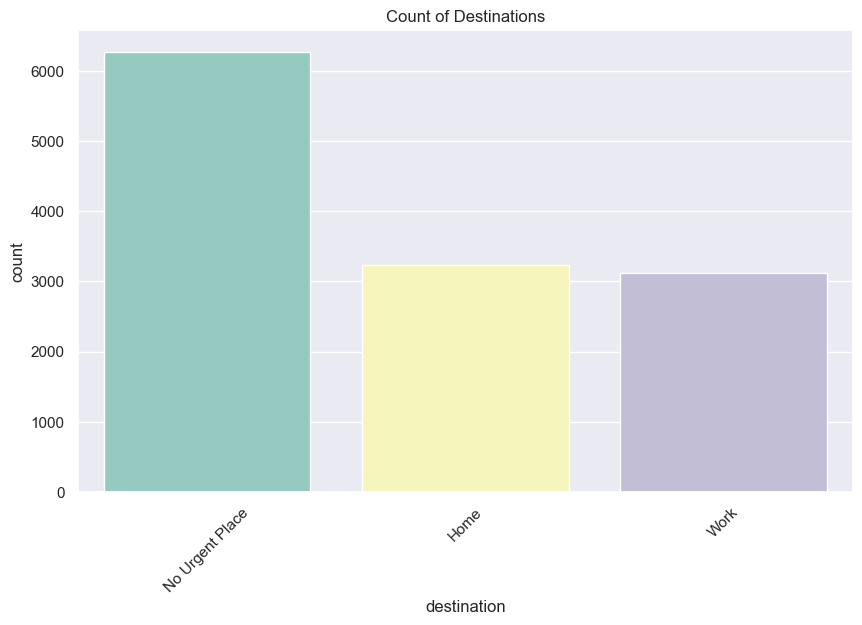

In [34]:
# Create a countplot for 'destination'
sns.set(style="darkgrid")  # Set the plot style

plt.figure(figsize=(10, 6))  # Set the figure size

sns.countplot(x="destination", data=data, palette="Set3")  # Create the countplot

plt.title("Count of Destinations")  # Add a title to the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

plt.show()  # Display the plot


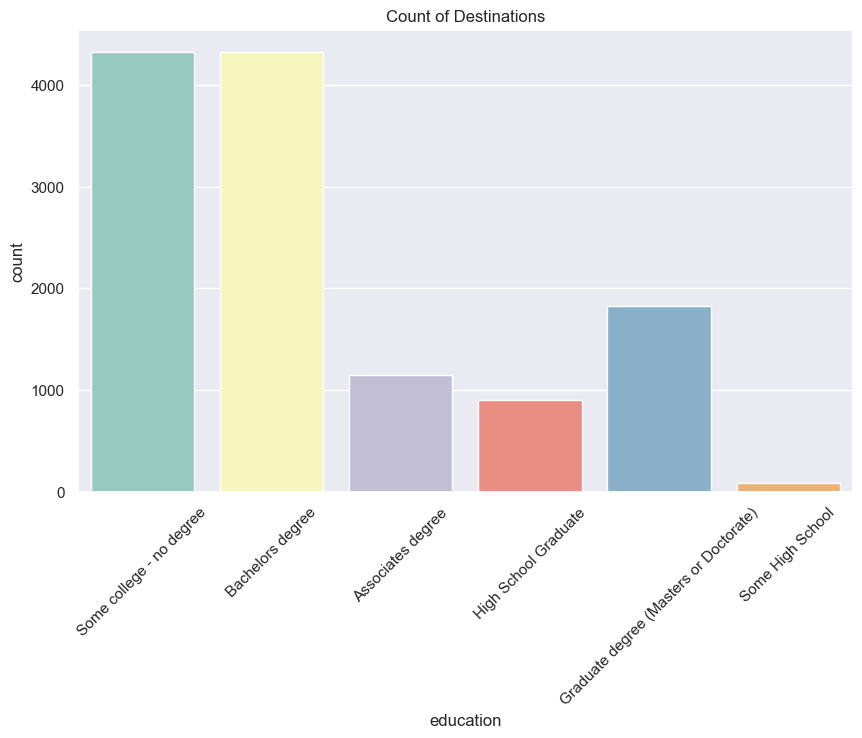

In [35]:
# Create a countplot for 'destination'
sns.set(style="darkgrid")  # Set the plot style

plt.figure(figsize=(10, 6))  # Set the figure size

sns.countplot(x="education", data=data, palette="Set3")  # Create the countplot

plt.title("Count of Destinations")  # Add a title to the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

plt.show()  # Display the plot

In [36]:
categorical_features = [
    'destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
    'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
    'education', 'income', 'coupon_freq', 'occupation_class'
]

The counting plots of the categorical features shows that the dataset has two kinds of categorical data: ordinal and nominal. The one hot encoder is
applied to nominal features however, ordinal data should be mapped into
numerical data to preserve the inner order.

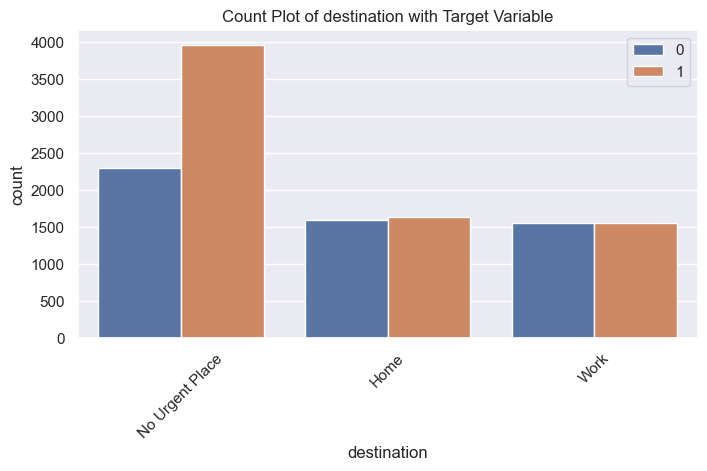

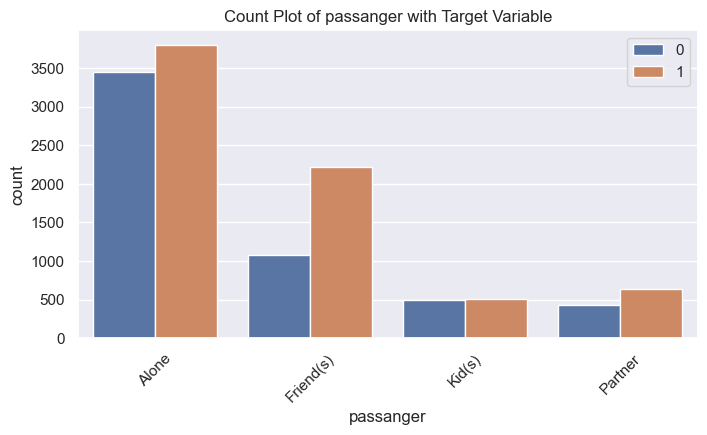

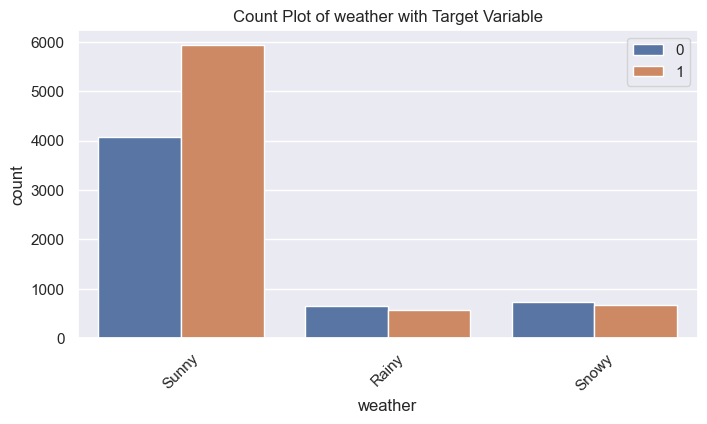

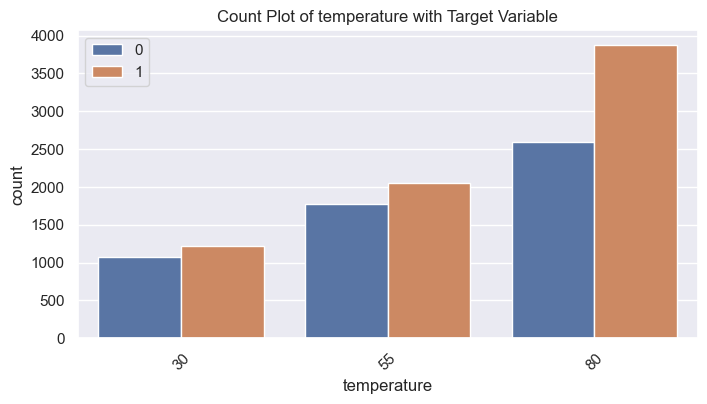

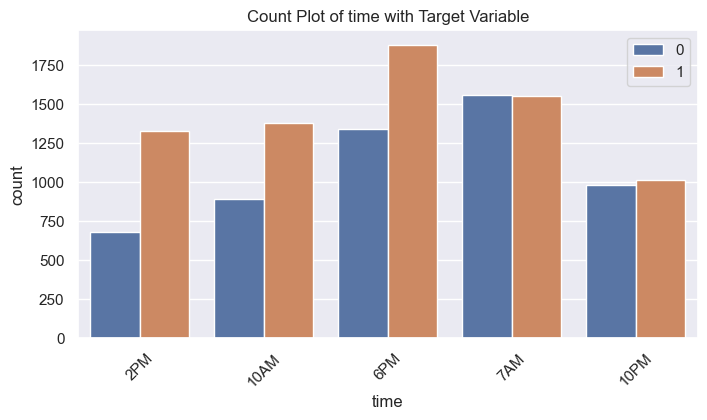

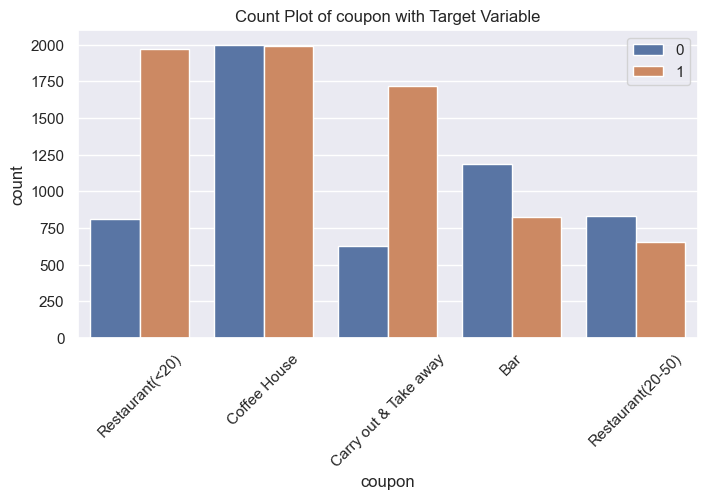

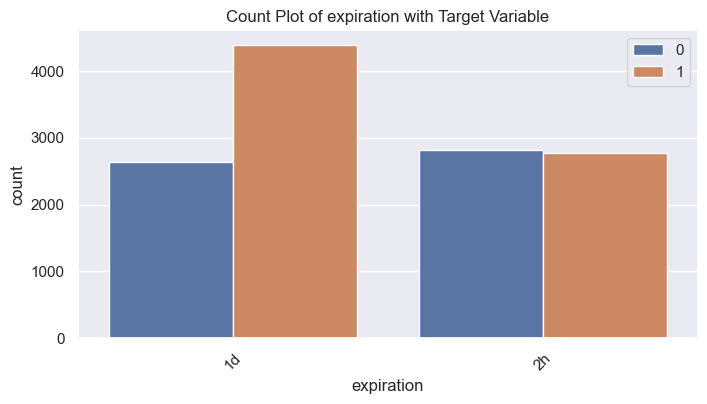

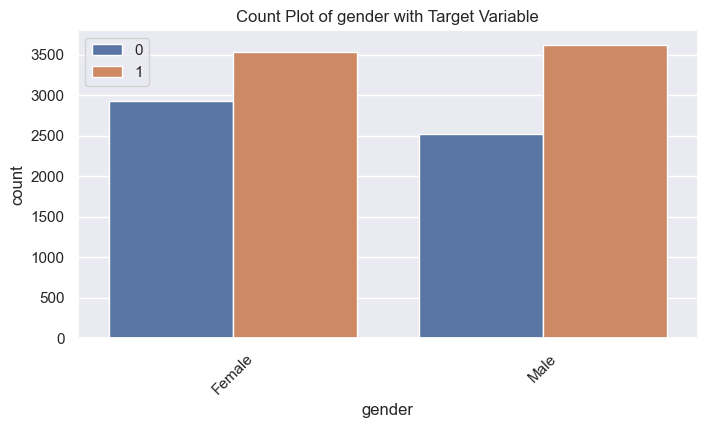

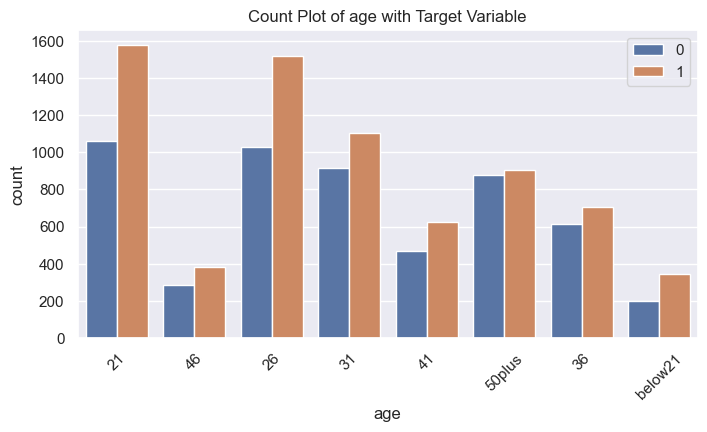

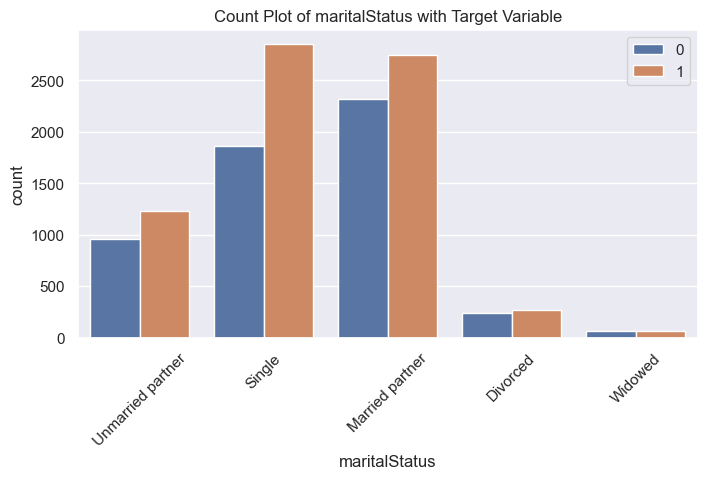

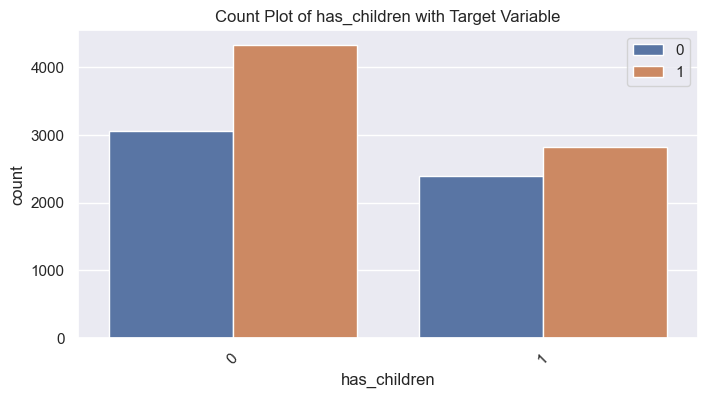

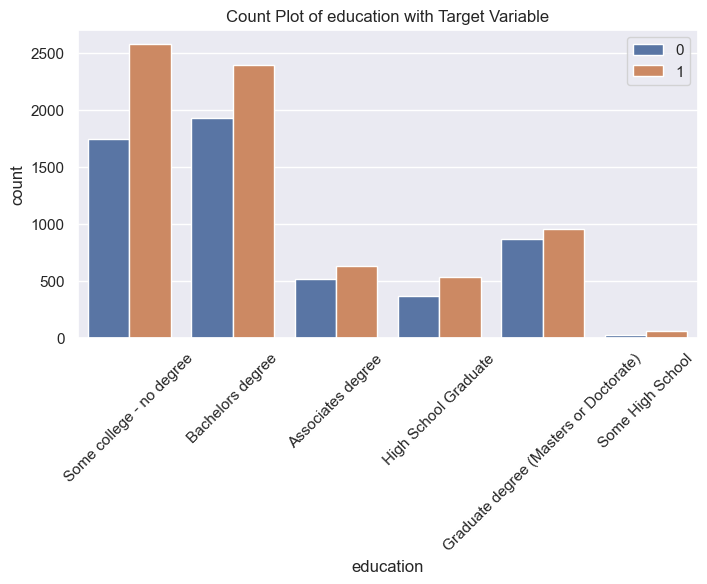

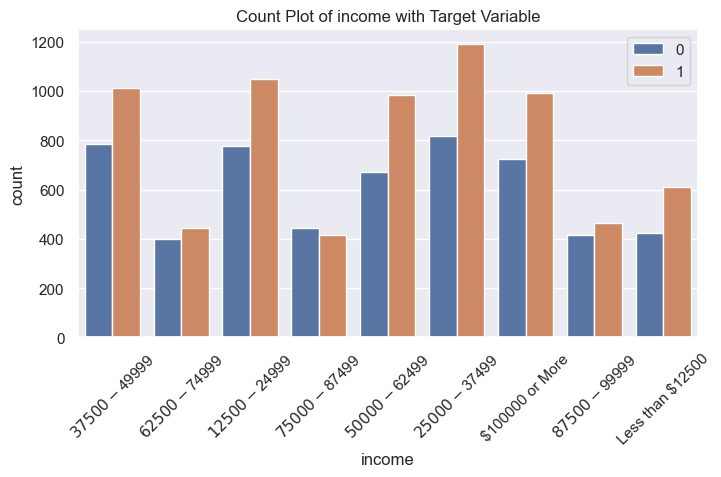

ValueError: Could not interpret input 'coupon_freq'

<Figure size 800x400 with 0 Axes>

In [37]:
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=X, x=feature, hue=y)
    plt.xticks(rotation=45)
    plt.title(f'Count Plot of {feature} with Target Variable')
    plt.show()

In [38]:
data


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,0,0,0,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,0,0,0,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,0,0,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,0,0,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,0,0,1,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,0,0,0,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,0,0,1,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,1,1,0,0
